In [2]:
from array import array
import math
import numpy as np

In [3]:
def generator_function(x,par,ichoice):
    if (ichoice == 5):
        return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x
    elif (ichoice ==6):
        return par[0]+par[1]*x+par[2]*x*x
    else:
        return par[0]+par[1]*x

In [4]:
def fitfunction(x,*paramlist):
    if (ichoice == 5):
        return paramlist[0]+paramlist[1]*x+paramlist[2]*x*x+paramlist[3]*x*x*x
    elif (ichoice ==6):
        return paramlist[0]+paramlist[1]*x+paramlist[2]*x*x
    else:
        return paramlist[0]+paramlist[1]*x

In [21]:
ichoice = 1

In [22]:
if ichoice == 1:
    m = 1
    n = 15
    par = []
    par.append(1.80)
    par.append(4.05)
    par = np.array(par)
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]
    jitter = np.array(jitter)
    sigma = [7,6,5,4,3,2,1,.5,1,2,3,4,5,6,7]
    sigma = np.array(sigma)
    Title = "Linear Fit"
    xlow = 0.0
    xhigh = 8.0
elif ichoice == 2:
    m = 1
    n = 10
    par = []
    par.append(6.81)
    par.append(0.656)
    par = np.array(par)
    jitter = [.3,.2,-.5,-.2,.2,.6,-.4,-1.5,.7,.5]
    jitter = np.array(jitter)
    sigma = [0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51]
    sigma = np.array(sigma)
    Title = "Linear Fit"
    xlow = 41.0
    xhigh = 50.0
elif ichoice == 3:
    m = 1
    n = 15
    par = []
    par.append(1.80)
    par.append(4.05)
    par = np.array(par)
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]
    jitter = np.array(jitter)
    sigma = [.7,6,5,4,3,2,1,.5,1,2,3,4,5,6,.7]
    sigma = np.array(sigma)
    Title = "Linear Fit"
    xlow = -4.0
    xhigh = 4.0
elif ichoice == 4:
    m = 1
    n = 15
    par = []
    par.append(1.80)
    par.append(4.05)
    par = np.array(par)
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]
    jitter = np.array(jitter)
    sigma = [1,2,3,4,5,6,7,8,7,6,5,4,3,2,1]
    sigma = np.array(sigma)
    Title = "Linear Fit"
    xlow = -4.0
    xhigh = 4.0
elif ichoice == 5:
    m = 3
    n = 15
    par = []
    par.append(1.80)
    par.append(4.05)
    par.append(0.00)
    par.append(0.20)
    par = np.array(par)
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]
    jitter = np.array(jitter)
    sigma = [7,6,5,4,3,2,1,.5,1,2,3,4,5,6,7]
    sigma = np.array(sigma)
    Title = "Cubic Fit"
    xlow = -4.0
    xhigh = 4.0
elif ichoice == 6:
    m = 2
    n = 15
    par = []
    par.append(1.80)
    par.append(4.05)
    par.append(5.10)
    par=np.array(par)
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]
    jitter = np.array(jitter)
    sigma = [1,2,3,4,5,6,7,8,7,6,5,4,3,2,1]
    sigma = np.array(sigma)
    Title = "Quadratic Fit"
    xlow = -4.0
    xhigh = 4.0
else:
    print("Invalid choice!!!!")

In [23]:
x = [0.0 for i in range(n)]
y = [0.0 for i in range(n)]
ex = [0.0 for i in range(n)]
ey = [0.0 for i in range(n)]
x = np.array(x)
y = np.array(y)
ex = np.array(ex)
ey = np.array(ey)

rootfitstring = "pol"+str(m)

In [24]:
for i in range(0,n):
    x[i]=float(xlow+(xhigh-xlow)*i/(n-1))
    y[i]=float(generator_function(x[i],par,ichoice)+jitter[i])
    ex[i]=float(0.0)
    ey[i]=float(sigma[i])
    
print(x,y,ex,ey)

[0.         0.57142857 1.14285714 1.71428571 2.28571429 2.85714286
 3.42857143 4.         4.57142857 5.14285714 5.71428571 6.28571429
 6.85714286 7.42857143 8.        ] [-0.2         6.11428571  5.42857143  9.74285714 11.05714286 11.37142857
 17.68571429 17.         21.31428571 22.62857143 22.94285714 29.25714286
 28.57142857 32.88571429 34.2       ] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [7.  6.  5.  4.  3.  2.  1.  0.5 1.  2.  3.  4.  5.  6.  7. ]


In [25]:
m_params = m + 1
a = np.zeros(shape = (m_params,m_params))
v = np.zeros(shape = (m_params,1))

In [26]:
for k in range(0,m_params):
    for i in range(0,n):
        v[k][0]=v[k][0]+y[i]*math.pow(x[i],k)/math.pow(ey[i],2)
    #print ("v[%d] = %f" % (k,v[k][0]))
    for j in range(0,m_params):
        for i in range(0,n):
            a[k][j]=a[k][j]+math.pow(x[i],k+j)/math.pow(ey[i],2)
        #print ("a[%d][%d] = %f" %(k,j,a[k][j]))
        
print ("A matrix = ")        
print (a)
print("V matrix = ")
print (v)

ainv = np.linalg.inv(a)
u1 = np.dot(a,ainv)

print ("A_inverse = ")
print (ainv)
print ("Diagonal Check:")
print (u1)
coeff = ainv*np.matrix(v)
print ("Coefficients:")
for k in range(0,m+1):
    print("k = %d, coeff = %f +/- %f" % (k,coeff[k],math.pow(ainv[k][k],0.5)))

A matrix = 
[[  7.0235941   28.09437642]
 [ 28.09437642 116.94893424]]
V matrix = 
[[124.85248866]
 [517.75417234]]
A_inverse = 
[[ 3.64237725 -0.875     ]
 [-0.875       0.21875   ]]
Diagonal Check:
[[ 1.000000e+00  2.780580e-16]
 [-4.448928e-15  1.000000e+00]]
Coefficients:
k = 0, coeff = 1.724963 +/- 1.908501
k = 1, coeff = 4.012798 +/- 0.467707


/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_84684/2090500146.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("k = %d, coeff = %f +/- %f" % (k,coeff[k],math.pow(ainv[k][k],0.5)))


In [27]:
yfit = 0
chi2 = 0

for i in range(0,n):
    for j in range(0,m+1):
        yfit = yfit + coeff[j]*math.pow(x[i],j)
    print ("i = %d  y = %f  yfit = %f" % (i,y[i],yfit))
    chi2 = chi2 + math.pow(((yfit-y[i])/ey[i]),2)
    yfit = 0
    
chi2perdof = chi2/(n-m)
print ("chi2/dof = %f / %f" % (chi2,(n-m-1)))

rho = np.zeros(shape = (m_params,m_params))

for k in range(0,m_params):
    for j in range(0,m_params):
        rho[k][j]=rho[k][j]+ainv[k][j]/math.sqrt(ainv[k][k]*ainv[j][j])    
print (rho)

i = 0  y = -0.200000  yfit = 1.724963
i = 1  y = 6.114286  yfit = 4.017990
i = 2  y = 5.428571  yfit = 6.311018
i = 3  y = 9.742857  yfit = 8.604045
i = 4  y = 11.057143  yfit = 10.897072
i = 5  y = 11.371429  yfit = 13.190099
i = 6  y = 17.685714  yfit = 15.483127
i = 7  y = 17.000000  yfit = 17.776154
i = 8  y = 21.314286  yfit = 20.069181
i = 9  y = 22.628571  yfit = 22.362208
i = 10  y = 22.942857  yfit = 24.655235
i = 11  y = 29.257143  yfit = 26.948263
i = 12  y = 28.571429  yfit = 29.241290
i = 13  y = 32.885714  yfit = 31.534317
i = 14  y = 34.200000  yfit = 33.827344
chi2/dof = 10.699207 / 13.000000
[[ 1.         -0.98026063]
 [-0.98026063  1.        ]]


/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_84684/1116166297.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ("i = %d  y = %f  yfit = %f" % (i,y[i],yfit))
/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_84684/1116166297.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  chi2 = chi2 + math.pow(((yfit-y[i])/ey[i]),2)


In [28]:
xfiterr = array('d')
yfiterr = array('d')
yfitplus2 = array('d')
yfitminus2 = array('d')

for i in range(0,n):
    xfiterr.append(xlow+(xhigh-xlow)*i/(n-1))
    yerror2 = 0.0
    yval = 0.0
    for k in range(0,m+1):
        for j in range(0,m+1):
            term = rho[k][j]*math.pow(xfiterr[i],k)*math.pow(ainv[k][k],0.5)*(math.pow(xfiterr[i],j)*math.pow(ainv[j][j],0.5))
            #print (k,j,term)
            yerror2 = yerror2 + term
        yval = yval + coeff[k]*math.pow(xfiterr[i],k)
    yfiterr.append(yval)
    yfitplus2.append(yval+math.sqrt(yerror2))
    yfitminus2.append(yval-math.sqrt(yerror2))
    print(i,xfiterr[i],yval,math.sqrt(yerror2),yfitplus2[i],yfitminus2[i])

0 0.0 [[1.72496327]] 1.9085013094182517 3.633464581284586 -0.18353803755191733
1 0.5714285714285714 [[4.01799048]] 1.6473632931080366 5.665353775858731 2.370627189642657
2 1.1428571428571428 [[6.31101769]] 1.3885573570312002 7.699575050666255 4.922460336603853
3 1.7142857142857142 [[8.6040449]] 1.133681785559039 9.737726690078453 7.470363118960375
4 2.2857142857142856 [[10.89707212]] 0.8861345219030418 11.783206637306815 10.010937593500731
5 2.857142857142857 [[13.19009933]] 0.6542870423334671 13.8443863686216 12.535812283954668
6 3.4285714285714284 [[15.48312654]] 0.4623914137176024 15.945517950890096 15.020735123454891
7 4.0 [[17.77615375]] 0.3773290978061344 18.15348284586299 17.398824650250717
8 4.571428571428571 [[20.06918096]] 0.4623914137176024 20.53157237265881 19.60678954522361
9 5.142857142857143 [[22.36220817]] 0.6542870423334667 23.016495212159043 21.707921127492106
10 5.714285714285714 [[24.65523538]] 0.8861345219030422 25.541369902612974 23.76910085880689
11 6.28571428571

/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_84684/604238187.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yfiterr.append(yval)
/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_84684/604238187.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yfitplus2.append(yval+math.sqrt(yerror2))
/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_84684/604238187.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yfitminus2.append(yval

Coefficients (from curve_fit)
[1.72496324 4.01279763]
Covariance Matrix (from curve_fit)
[[ 3.64237678 -0.87499986]
 [-0.87499986  0.21874996]]
Chi^2 / dof = 1.070E+01 / 13
Fit Parameter 0: 1.725E+00 +/- 1.909E+00
0 1 -9.803E-01
Fit Parameter 1: 4.013E+00 +/- 4.677E-01


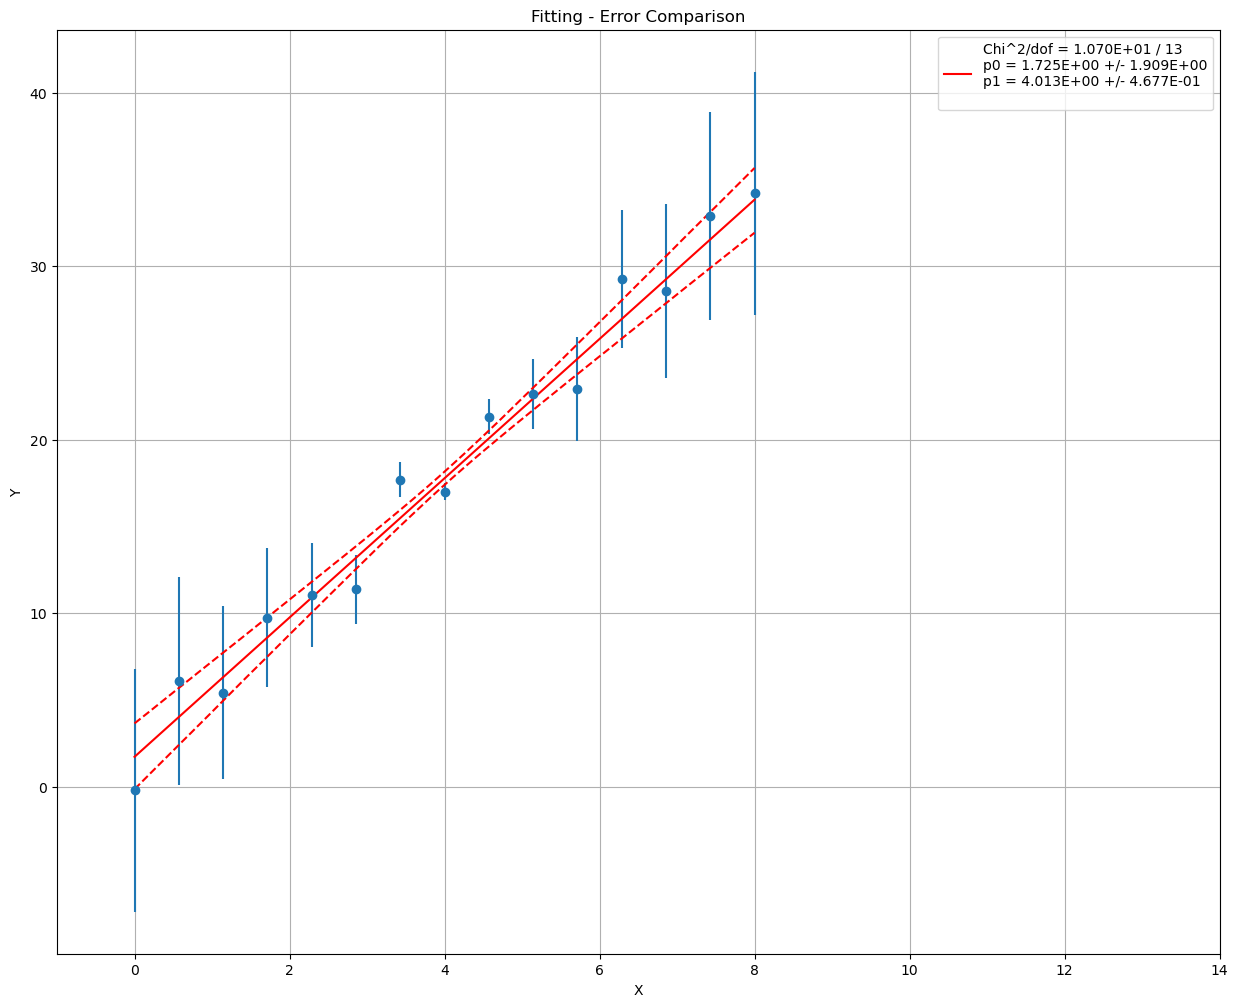

In [29]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Fitting - Error Comparison")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim(xlow-1,xhigh+6)
ax1.set_yscale("linear")
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')

init_vals = [0.0 for x in range(0,m_params)]
popt, pcov = curve_fit(fitfunction,x,y,p0=init_vals,sigma=sigma,absolute_sigma=True)

xi = np.linspace(np.min(x),np.max(x),100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

npoints = n

yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(fitfunction(x[i],*popt))
    #chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])
    chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])/(sigma[i]*sigma[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

param = []
rhom = []
param.append(float(chi2))
param.append(npoints-len(init_vals))
for ii in range(0,len(init_vals)):
    param.append(float(popt[ii]))
    param.append(float(np.sqrt(pcov[ii][ii])))
    print("Fit Parameter %d: %.3E +/- %.3E" % (ii,popt[ii],np.sqrt(pcov[ii][ii])))
    for jj in range(0,len(init_vals)):
        rhom.append(float(pcov[ii][jj])/pow(float(pcov[ii][ii]*pcov[jj][jj]),0.5))
        if jj > ii:
            print("%d %d %.3E" % (ii,jj,rhom[ii*len(init_vals)+jj]))

mylabel = "Chi^2/dof = %.3E / %d\n"
for i in range(0,len(init_vals)):
    code = "p" + str(i)
    mylabel = mylabel + code + " = %.3E +/- %.3E\n"

ax1.plot(xi, fitfunction(xi, *popt), 'r-', label = mylabel % tuple(param))
ax1.plot(xi,lower,'r--')
ax1.plot(xi,upper,'r--')

leg = ax1.legend()
plt.show()

In [30]:
yerr_trad = array('d')
yerr_proper = array('d')
ymax = 0.0
for index in range(n):
    yfitvalue = 0.0
    yerrorvalue = 0.0
    for k in range(0,m_params):
        yfitvalue = yfitvalue + coeff[k]*math.pow(x[index],k)
        yerrorvalue = yerrorvalue + math.pow(math.pow(x[index],k)*math.pow(ainv[k][k],0.5),2)
    yerrorvalue = math.sqrt(yerrorvalue)
    if yerrorvalue>ymax:
        ymax = yerrorvalue
    print ("P201 Error Calculation = %f +/- %f " % (yfitvalue,yerrorvalue))
    print ("Proper Error Calculation = %f +/- %f " % ((yfitplus2[index]+yfitminus2[index])/2.0,(yfitplus2[index]-yfitminus2[index])/2.0))
    yerr_trad.append(yerrorvalue)
    yerr_proper.append((yfitplus2[index]-yfitminus2[index])/2.0)

print(x,yerr_trad,yerr_proper)

P201 Error Calculation = 1.724963 +/- 1.908501 
Proper Error Calculation = 1.724963 +/- 1.908501 
P201 Error Calculation = 4.017990 +/- 1.927124 
Proper Error Calculation = 4.017990 +/- 1.647363 
P201 Error Calculation = 6.311018 +/- 1.981941 
Proper Error Calculation = 6.311018 +/- 1.388557 
P201 Error Calculation = 8.604045 +/- 2.070081 
Proper Error Calculation = 8.604045 +/- 1.133682 
P201 Error Calculation = 10.897072 +/- 2.187518 
Proper Error Calculation = 10.897072 +/- 0.886135 
P201 Error Calculation = 13.190099 +/- 2.329827 
Proper Error Calculation = 13.190099 +/- 0.654287 
P201 Error Calculation = 15.483127 +/- 2.492751 
Proper Error Calculation = 15.483127 +/- 0.462391 
P201 Error Calculation = 17.776154 +/- 2.672523 
Proper Error Calculation = 17.776154 +/- 0.377329 
P201 Error Calculation = 20.069181 +/- 2.865974 
Proper Error Calculation = 20.069181 +/- 0.462391 
P201 Error Calculation = 22.362208 +/- 3.070520 
Proper Error Calculation = 22.362208 +/- 0.654287 
P201 Err

/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_84684/577883384.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ("P201 Error Calculation = %f +/- %f " % (yfitvalue,yerrorvalue))


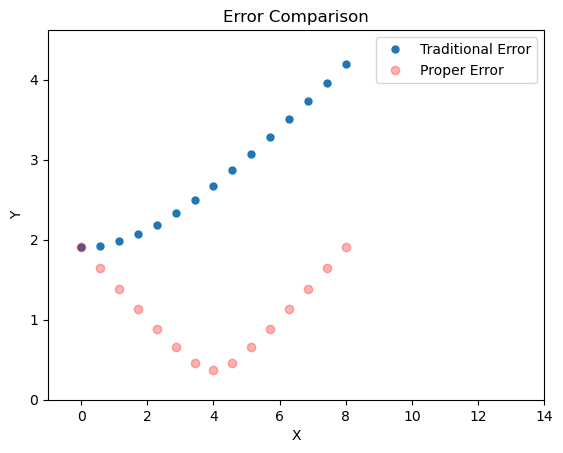

In [31]:

fig, ax = plt.subplots()

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("Error Comparison")
ax.set_xlim(xlow - 1.0, xhigh + 6.0)
ax.set_ylim(0.0, 1.1 * ymax)

# Plot traditional error band
ax.plot(x, yerr_trad, 'o', markersize=5, label='Traditional Error')

# Plot proper error band
ax.plot(x, yerr_proper, 'o', color='red', alpha=0.3, label='Proper Error')

ax.legend()

plt.show()